# Propositional Learning

In the previous notebooks, we've demonstrated how logic can be used to reason about data using knowledge. We've also seen how LNNs extend truth value semantics to include uncertainties and ambiguities about beliefs. However, one of the key advantages of neural networks is their ability to learn from the data and update parameters to achieve some objective. In this notebook, we'll demonstrate how learnable parameters can be included into LNNs and allow for logical consistency to be enforced.

### Learning Outcomes Of This Tutorial

1. Learning To Be Consistent
    1. Representing Inconsistencies
    2. Parameterising The Operators
    3. LNN Training

## Learning To Be Consistent

### Representing Inconsistencies

The [Propositional Logic Notebook](./0.%20Propositional%20Logic.ipynb) demonstrates how LNNs represent knowledge using as graphical structure to perform reasoning. These structures encode knowledge in a manner that is consistent with existing theorem provers but extend them by allowing bounds to encode truth value semantics. One of the advantages of using this representation is that logical inconsistencies can be identified once reasoning has taken place.

<center>
    <figure>
    <img src="./img/2/unweighted_representation.png" width="320" />
        <figcaption>Figure 1. Graphical representation of an LNN</figcaption>
 </figure>
</center>

A [logical inconsistency](https://en.wikipedia.org/wiki/Consistency) is a belief that a node should both be _True_ and _False_ simultaneously, introducing a new state called a <strong style=color:#d02670>CONTRADICTION</strong>. In LNNs it occurs when an inference computation updates the correct truths to be outside a viable range. From the bounds representation, this occurs when the lower bound crosses over the upper bound and introduces an infeasible inequality for the correct truth value, $T$:
\begin{equation}L_x > U_x,  T_x > L_x, T_x < U_x\end{equation}

<center>
    <figure>
    <img src="./img/2/contradiction.png" width="320" />
        <figcaption>Figure 2. Inconsistent inferences causes a contradiction</figcaption>
 </figure>
</center>

In a classical system, the bounds representation of a contradiction is therefore $[L, U] = [1, 0]$

### Parameterising The Operators

To allow for parameter learning, LNNs extend the operators to a weighted real-value logic that can be updated using gradient descent and backpropogation techniques. This is achieved by parameterising the edges of the graph such that each operand has a weighted influence on the truth of the operator, in line with current neural networks.

<center>
    <figure>
    <img src="./img/2/weighted_representation.png" width="320" />
        <figcaption>Figure 3. Weighted representation of an LNN graph</figcaption>
 </figure>
</center>

Each weighted [real-value logic](https://en.wikipedia.org/wiki/Fuzzy_logic) has a different definition of a logical operation (even for the same symbol), but we can implement them all by modifying the activation function. In LNNs we therefore use a graph representation whereby some of the nodes behave as neurons, i.e. for weighted logical connectives such as `And`, `Or`, `Implies`.

### LNN Training

In this section, we demonstrate how to train a single logical conjunction to become consistent when inconsistencies arise. 

If we are given a mix of _True_ and _False_ propositions in a logical conjunction that we expected to also be _True_:
<center>
    <figure>
    <img src="./img/2/and_1.png" width="520" />
        <figcaption>Figure 1. Logical conjunction between nodes</figcaption>
 </figure>
</center>

In [13]:
from lnn import Propositions, And, Fact

# Rules
A, B, C, D, E = Propositions("A", "B", "C", "D", "E")
AND = And(A, B, C, D, E)


# Data
A.add_data(Fact.TRUE)
B.add_data(Fact.FALSE)
C.add_data(Fact.TRUE)
D.add_data(Fact.FALSE)
E.add_data(Fact.TRUE)
AND.add_data(Fact.TRUE)

We expect an upward inference at the conjunction will cause a contradiction:
<center>
    <figure>
    <img src="./img/2/and_2.png" width="520" />
        <figcaption>Figure 2. Upward inference causing a contradiction</figcaption>
 </figure>
</center>

In [14]:
from lnn import Model, Loss, Direction

# Knowledge
model = Model()
model.add_knowledge(AND)

# Reasoning
model.infer()
AND.print()

OPEN And: (A ∧ B ∧ C ∧ D ∧ E)                      CONTRADICTION (1.0, 0.0)



By introducing a loss on the contradiction:

\begin{align}
 Loss = \lambda \sum_{\forall i} \text{max} (0, L_i - U_i)
\end{align}

we can train the LNN to adjust the weights such that all sources of contradictions (the _False_ inputs) become downweighted and eventually removed.

<center>
    <figure>
    <img src="./img/2/and_3.png" width="520" />
        <figcaption>Figure 3. Training the LNN using a contradiction loss</figcaption>
 </figure>
</center>


A final reasoning pass with the updated parameters causes the logical conjunction to remain <strong style=color:#0e6027>TRUE</strong> and keeps it consistent with the data that has been supplied. 


OPEN And: (A ∧ B ∧ C ∧ D ∧ E)                               TRUE (1.0, 1.0)
params  α: 1.0,  β: 1.0,  w: [1. 0. 1. 0. 1.]

***************************************************************************
                                LNN Model

OPEN And: (A ∧ B ∧ C ∧ D ∧ E)                               TRUE (1.0, 1.0)

OPEN Proposition: E                                         TRUE (1.0, 1.0)

OPEN Proposition: D                                        FALSE (0.0, 0.0)

OPEN Proposition: C                                         TRUE (1.0, 1.0)

OPEN Proposition: B                                        FALSE (0.0, 0.0)

OPEN Proposition: A                                         TRUE (1.0, 1.0)

***************************************************************************


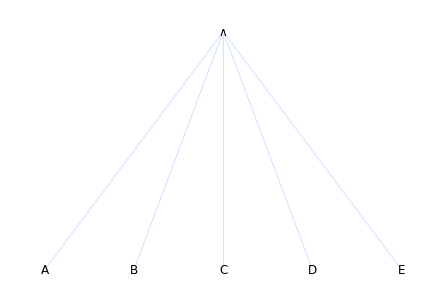

In [15]:
# Training
model.train(direction=Direction.UPWARD, losses=[Loss.CONTRADICTION])
AND.print(params=True)
model.print()
model.plot_graph()

As expected, the weights of the `False` inputs have all dropped to zero, removing their contribution to the truth of the `And` node. The resulting network therefore reasons in a self-supervised manner, ensuring that the interaction between the knowledge and the data is consistent.
> When unspecified, the loss coefficient $\lambda = 1$

### In Summary

In this notebook we learnt the following:
- The bounds representation also allows for contradictions to be represented.
- Contradictions occur at inference due to opposing truth updates.
- LNNs extend the logical theory by allowing weights on real-value computations .
- A loss can be introduced on inconsistencies for each node in the graph.
- Inconsistent inputs can be downweighted to remove their influence on operator truths.

Congrats on completing the Propositional Learning 🎉. Next, we will learn about upward inference.
> For those who have been taking the [IBM Neuro-Symbolic AI Essentials](https://ibm.biz/nsai-essentials) badge, proceed to the [propositional experiment](./experiments/experiment%200.ipynb) to test your skills.